In [1]:
import os
import pickle

import pandas as pd
import datetime as dt
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

from keras.models import load_model
import tweepy
import json

os.chdir('C:\\Users\\kosta\\Desktop\\projects\\twitter\src')
from predict import predict
from decode_sentiment import decode_sentiment
import twitter_credentials
from fetch_tweets import fetch_tweets

os.chdir('C:\\Users\\kosta\\Desktop\\projects\\twitter\models')
tokenizer = pickle.load(open('tokenizer.pkl', "rb"))
model = load_model('model.h5')


Using TensorFlow backend.


In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
auth = tweepy.OAuthHandler(twitter_credentials.consumer_key, twitter_credentials.consumer_secret)
auth.set_access_token(twitter_credentials.access_token, twitter_credentials.access_token_secret)
api = tweepy.API(auth)

In [5]:
screen_name = 'tceu_'
df_tweets = fetch_tweets(screen_name,api)
df_tweets['Date'] = pd.to_datetime(df_tweets['Date'].dt.date)
df_tweets['free_text'] = df_tweets['free_text'].apply(lambda row_text: row_text.decode("utf-8"))

In [6]:
print('No. of tweets: {}'.format(df_tweets.shape[0]))

No. of tweets: 75


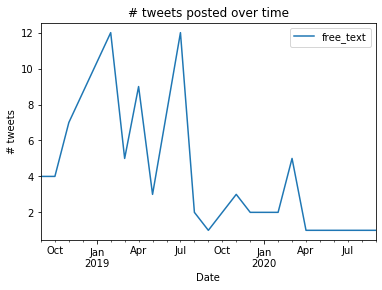

In [7]:
df_tweets.groupby(df_tweets['Date'].dt.to_period('M')).agg({'free_text':'count'}).reset_index().plot('Date','free_text')
plt.ylabel('# tweets')
plt.title('# tweets posted over time')
plt.show()

In [20]:
text = df_tweets.sample(n=1)['free_text'].values[-1]
print(text,'\n')
predict(text=text,SEQUENCE_LENGTH=300,saved_tokenizer=tokenizer,saved_model=model)

Full house for Toyota Connected Tech Nights. Thank you to all who turned out 🙌🏻 #tceutechnights https://t.co/1EjtfoJrML 



{'label': 'POSITIVE',
 'score': 0.9617104530334473,
 'elapsed_time': 0.02393651008605957}

In [9]:
df_tweets['polarity'] = df_tweets['free_text'].apply(lambda row_text: predict(row_text,SEQUENCE_LENGTH=300,saved_tokenizer=tokenizer,saved_model=model)['label'])

In [10]:
df_tweets['score'] = df_tweets['free_text'].apply(lambda row_text: predict(row_text,SEQUENCE_LENGTH=300,saved_tokenizer=tokenizer,saved_model=model)['score'])

In [11]:
df_tweets.groupby('polarity').size()

polarity
NEUTRAL     12
POSITIVE    63
dtype: int64

In [19]:
df_tweets.groupby('polarity').head(5)

,Date,free_text,polarity,score
0,2020-09-11,A Message From The Team. https://t.co/6Ae8fC7SX7,POSITIVE,0.937148
1,2020-04-10,"RT @karimtoubajie: For anyone at St George's Hospital, I recorded the ICU segment on BBC London this evening (9th April 2020) as we've been…",NEUTRAL,0.733527
2,2020-03-25,We hosted our first virtual workout with the team and I’d say it went pretty well 💪🏽 https://t.co/WkDGxZ9rk7,POSITIVE,0.967182
3,2020-03-23,We’ve come up with some creative virtual ideas to keep the team engaged and connected;\n\nMorning Meditation \nCooking… https://t.co/ZS8DXFvBOx,POSITIVE,0.958042
4,2020-03-15,@TGR_WRC congrats on the top step!! Sweet victory. 🥇 🥳 https://t.co/P6BMW33jZJ,POSITIVE,0.994482
5,2020-03-11,TOYOTA https://t.co/Otw333yyNY,NEUTRAL,0.753525
6,2020-03-11,"RT @TGR_WRC: Hola, México! 🇲🇽\n\nWe had a great welcome event in Mexico City with @ToyotaMex on Saturday, with @ElfynEvans and @KalleRovanper…",POSITIVE,0.989230
18,2019-08-07,https://t.co/ycAMQl6caX https://t.co/zBscpx3c0q,NEUTRAL,0.677253
20,2019-07-26,The morning commute! 🚲 @BromptonBicycle #Mobility https://t.co/xHTgTxWp4y,NEUTRAL,0.748767
21,2019-07-21,RT @clupu: Did not imagined how cool my career will become when I discovered 9 years ago #rstats @ToyotaConEurope -&gt; Collaborating with Wor…,NEUTRAL,0.411417
